# DIGITAL EPIDEMIOLOGY


# Assignment 2 - A study of the Chronic Kidney Disease


# Giacomo Maretto, Gabriel Nespoli

# PART 1: CORRELATION STUDY

# 1.1

Study the correlation between the ground truth data and the Google Trends data. Explore multiple features of the ground truth data (e.g., crude prevalence, age-adjusted prevalence, etc.), and multiple keywords or entity types for querying the Google Trends data. Check for stability (or lack there of) across different years.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [25]:
# from a dataframe |keyword|correlation|, get a subset of this dataframe according to the threshold for the correlation.
# It will return the keywords with correlation greater or equal than threshold.
def get_most_correlated_terms_df(df, threshold=0.1):
    # order the keywords by the correlation average value
    df.sort_values(by="correlation", ascending=False, inplace=True)
    
    # check if the threshold passed is a float and return a subset of the dataset, otherwise raise an exception
    if isinstance(threshold, float):
        return df.loc[df["correlation"] >= threshold]
    raise AttributeError("Exception in get_most_correlated_terms method. 'threshold' must be float.")

In [26]:
# Load all the dataframes of correlations and get the keywords with the best correlation between the 
# ground truth and google dataset, considering all the years in 'years'
def get_compound_most_correlated_terms_df(file_type="AA", 
                                          years = [2011,2012,2013,2014,2015,2016], threshold=0.1):
    # create an empty dataset that will be filled and returned later
    most_correlated_df = pd.DataFrame(columns=["keyword","correlation"])
    
    # sufix defines the right file to be read, according to the ground-truth data to be analyzed
    sufix = ""
    if file_type == 'AA':
        sufix = "_" + file_type
    
    # iterate over the years populating the aforementioned empty dataframe with the keywords that
    # have a high correlation with the GT data. The resulting dataframe will be a long table
    # with words of each year that attend the condition 'correlation >= threshold'.
    for year in years:
        df = pd.read_csv('overall_correlation_'+ str(year) + sufix + '.csv', sep=';')
        df = get_most_correlated_terms_df(df, threshold=threshold)
        most_correlated_df = most_correlated_df.append(get_most_correlated_terms_df(df, threshold=threshold))
    
    # sort the dataframe by the correlation and drop the repeated keywords, preserving the highest correlated copy
    df.sort_values(by="correlation", ascending=False, inplace=True)
    most_correlated_df.drop_duplicates(subset="keyword", keep="first", inplace=True)
    most_correlated_df.reset_index(drop=True, inplace=True)
    return most_correlated_df

In [27]:
# plot the correlation between the Google Trends keywords and the ground-truth data over the years.
# The y-axis shows the correlation value (between 0 and 1), and the x-axis presents the keywords that
# appear with a high correlation (>=threshold) in all the years. Each line of the graph represents a year.
def plot_keywords_correlation(file_type="AA", years = [2011,2012,2013,2014,2015,2016], threshold=0.1):
    
    # creates an empty dataframe that will be store the values of the plot
    corr_keywords_plot = pd.DataFrame(columns=["keyword", "correlation"])
    years = list(reversed(years))  # the most recent year appears first
    
    # mark the first loop of the iteration. It will define if the corr_keywords_plot will be initialized or,
    # if exists, updated.
    first_execution = True
    
    # create a dataframe with the correlation containing only the terms that repeated in all 'years'. That is,
    # an inner join is done.
    for year in years:
        corr_df = get_compound_most_correlated_terms_df(file_type=file_type, years = [year], threshold=threshold)
        if first_execution:
            corr_keywords_plot = corr_df
            first_execution = False
        else:
            # do an inner join based on the keyword. Only keywords that appear in all the years
            # will be in the plot
            corr_keywords_plot = corr_keywords_plot.merge(corr_df, on=["keyword"], how="inner")
    
    # rename the columns, assigning the year to them
    corr_keywords_plot.columns = ["keyword"] + years
    
    # initialize the plot variables
    fig, ax = plt.subplots()
    
    # plot the curve for each year
    for year in years:
        corr_keywords_plot[year].plot(ax=ax)
    
    # reduce the font size of the legend and move it outside the boxplot
    ax.legend(fontsize="small", bbox_to_anchor=(1, 1))
    
    # define the title and the labels
    if file_type == "AA":
        file_type = "age-adjusted prevalence"
    elif file_type == "CP":
        file_type = "crude prevalence"
    plt.title("Correlation comparison for the " + file_type + " ground-truth data using Google Trends keywords")
    plt.ylabel("Correlation")
    plt.xlabel("Query")
    
    # The plot prints in the x-axis just the position of the keywords (ie. 1,2,3..), not the keywords themselves.
    # A workaround is to map the position to the keyword that it represents
    x_label_sequence = list(range(len(corr_keywords_plot["keyword"].values)))
    plt.xticks(x_label_sequence, corr_keywords_plot["keyword"].values, rotation=90)

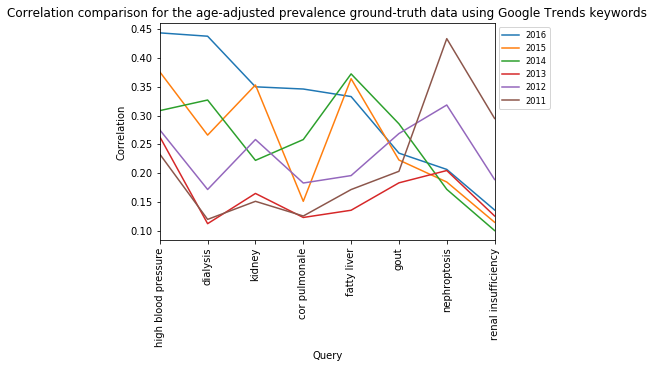

In [28]:
plot_keywords_correlation()

The above graph shows the searched terms on Google Trends with highest correlation with the ground-truth data (age-adjusted) in repeated years. This means that only these eight terms had a correlation with the ground-truth higher than 0.1 from 2011 to 2016.

With few counter examples, it is shown that the more recent is the year, the better is the correlation. This can be explained through the growing in the Internet access and usage. This recent increase was specially observed in the older and poorer population. The idea is that the population is more informed and using more Internet to search for symptoms, treatment and prevention of diseases.

Studying deeper the terms, it comes out that they are very significant terms in the universe of the Chronic Kidney Disease, and this affirmation is confirmed by studies, available in the links below:

high blood pressure: https://www.niddk.nih.gov/health-information/kidney-disease/chronic-kidney-disease-ckd/high-blood-pressure

dialysis: https://emedicine.medscape.com/article/238798-treatment

cor pulmonale: https://www.ncbi.nlm.nih.gov/pubmed/22669490

fatty liver kidney: http://care.diabetesjournals.org/content/39/10/1830

gout: https://www.kidney.org/atoz/content/gout

nephroptosis: http://medsideen.bitballoon.com/urinology15/nephroptosis-nephro395.html

renal insuficiency: https://www.ncbi.nlm.nih.gov/pubmed/16344727

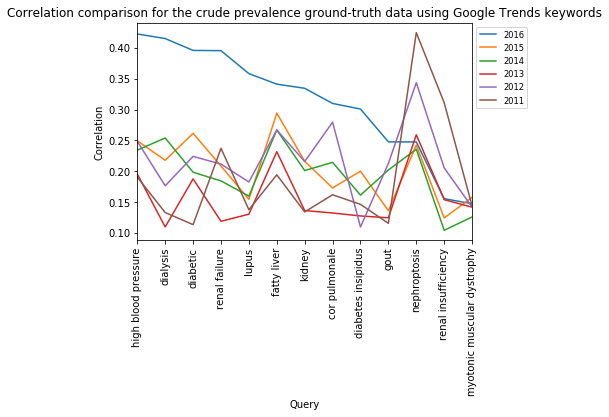

In [29]:
plot_keywords_correlation(file_type="CP")

It was found five more terms with significant correlation with the ground-truth data (crude prevalence): diabetes insipidus, renal failure, lupus, diabetic and myotonic muscular dystrophy.

diabetes insipidus: https://www.niddk.nih.gov/health-information/kidney-disease/diabetes-insipidus

renal failure: https://emedicine.medscape.com/article/238798-overview

lupus: https://www.kidney.org/atoz/content/lupus

diabetic: https://www.kidney.org/news/newsroom/factsheets/Diabetes-And-CKD

myotonic muscular dystrophy: https://www.ncbi.nlm.nih.gov/pubmed/29029879

It can be seen the same relation through the years with the ground-truth crude prevalence dataset, except for the keywords gout, nephroptosis, renal insufficiency and myotonic muscular dystrophy.

# 1.2

Study the correlation of your target ground truth feature with income/poverty features.

In [30]:
# define the list of states of the ground truth to be used (it varies according to the year)
df_gt = pd.read_csv('2012_AA.csv', sep=";",usecols=["LocationDesc"])
df_gt.dropna(subset=['LocationDesc'], inplace=True)
df_gt.drop(df_gt.tail(2).index, inplace=True)
states = df_gt["LocationDesc"]

# Calculate the correlation between the average household income of the states and the ground-truth
# data over the years.
def get_income_correlation_df(gt_type="AA", years = [2011,2012,2013,2014,2015,2016]):
    corr = []
    output_df = pd.DataFrame(columns=["year", "correlation"])
    income_df = pd.read_csv("income_per_vector_2011-2016.csv", sep=";")
    
    # gt_type defines the GT that will be used to calculate the correlation with the income
    if gt_type == "AA":
        gt_type = "_AA"
    if gt_type == "CP":
        gt_type = ""
    
    #iterate over the years calculating the correlation of the income with each GT dataset
    for year in years:
        gt_filename = str(year) + gt_type + '.csv'
        gt_df = pd.read_csv(gt_filename, sep=";", usecols=["LocationDesc", "Data_Value"])
        gt_df = gt_df.loc[gt_df["LocationDesc"].isin(states)]  # guarantees that only the 51 states will be used
        corr.append(pearsonr(income_df[str(year)], gt_df["Data_Value"])[0])
    
    # the output is the correlation per year: |year|correlation|
    output_df["year"] = years
    output_df["correlation"] = corr
    output_df.set_index("year", inplace=True)
    
    return output_df

In [31]:
# plot the correlation between the average household income of the states of USA and the ground-truth data
# over the years. The y-axis shows the correlation value (between 0 and 1), and the x-axis presents the years.
# Each line of the graph represents a ground-truth dataset [age-adjusted prevalence, crude prevalence].
def plot_income_correlation(years = [2011,2012,2013,2014,2015,2016]):
    income_df = get_income_correlation_df()
    income_df["Crude Prevalence"] = get_income_correlation_df(gt_type="CP")
    
    # rename the columns of the dataframe
    income_df.columns = ["age-adjusted prevalence", "crude prevalence"]
    
    # plot the curve for each year
    income_df.plot()
    
    # set title and labels of the graph
    plt.title("Correlation comparison of the ground truth data and the average household income")
    plt.ylabel("Correlation")
    plt.xlabel("Year")

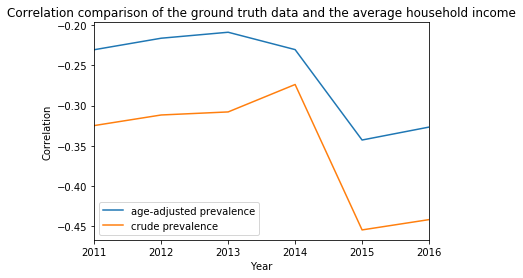

In [32]:
plot_income_correlation()

The graph exibit a negative correlation between the average household income of the state in United State and the incidence of the Chronic Kidney Disease. Important factors to sustain this relation is that infectious diseases, poor sanitation, inadequate supply of safe water, environmental pollutants and high concentrations of disease-transmitting vectors  play an important role in the development of CKD in low-income sites. African-Americans, historically a poorer population in USA, can have more than three times more risk to suffer from CKD.

It was also found that there is a circular effect between the poverty and CKD, which means that the patients tends to decrease their income over time.

The aforementioned affirmations are confirmed in the following studies:

https://academic.oup.com/ckj/article/8/1/3/434867
https://www.sciencedirect.com/science/article/pii/S2468024917304795
https://www.kidney.org/news/newsroom/nr/Low-Income-Linked-to-Higher-Levels-of-Kidney-Disease

Moreover, it is noticed that the correlation is higher when the age standardization is applied over the dataset, correcting the discrepancy in the age profile of the population of each state.